In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
from matplotlib.collections import LineCollection
import numpy as np

file_path = "../Resources/Original_Data.csv"
original_df = pd.read_csv(file_path)
original_df.head()


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,...,sy_kepmag,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,...,NaN,2014-05-14,2008-01,2014-05-14,2,1,2,0,0,0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,NaN,2014-07-23,2011-08,2014-07-23,2,1,2,0,0,0
2,3,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,2018-04-25 14:08:01,2011-08,2014-07-23,0,1,1,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,NaN,2018-09-04 16:14:36,2017-03,2018-09-06,0,1,1,0,0,0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,2018-04-25 14:08:01,2009-10,2014-05-14,0,1,1,0,0,0


In [7]:
project_data = original_df[["pl_name", "hostname", "disc_year", "sy_snum", "sy_pnum", "pl_rade", "pl_masse", "pl_dens", "pl_orbper", "pl_orbsmax", "pl_eqt", "st_teff", "st_rad", "st_mass", "st_dens", "sy_dist"]]
project_data.head()

,pl_name,hostname,disc_year,sy_snum,sy_pnum,pl_rade,pl_masse,pl_dens,pl_orbper,pl_orbsmax,pl_eqt,st_teff,st_rad,st_mass,st_dens,sy_dist
0,11 Com b,11 Com,2007,2,1,NaN,NaN,NaN,326.03000,1.29,NaN,4742.0,19.00,2.70,NaN,93.1846
1,11 Com b,11 Com,2007,2,1,NaN,NaN,NaN,NaN,1.21,NaN,NaN,NaN,2.60,NaN,93.1846
2,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,NaN,1.51,NaN,NaN,NaN,1.70,NaN,125.3210
3,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,516.21997,1.53,NaN,4213.0,29.79,2.78,NaN,125.3210
4,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,516.22000,1.54,NaN,4340.0,24.08,1.80,NaN,125.3210


In [8]:
no_dup_data = project_data.drop_duplicates(subset = ["pl_name"])
no_dup_data

,pl_name,hostname,disc_year,sy_snum,sy_pnum,pl_rade,pl_masse,pl_dens,pl_orbper,pl_orbsmax,pl_eqt,st_teff,st_rad,st_mass,st_dens,sy_dist
0,11 Com b,11 Com,2007,2,1,NaN,NaN,NaN,326.030000,1.290000,NaN,4742.0,19.00,2.7,NaN,93.1846
2,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,NaN,1.510000,NaN,NaN,NaN,1.7,NaN,125.3210
5,14 And b,14 And,2008,1,1,NaN,NaN,NaN,185.840000,0.830000,NaN,4813.0,11.00,2.2,NaN,75.4392
7,14 Her b,14 Her,2002,1,1,NaN,NaN,NaN,NaN,2.730000,NaN,NaN,NaN,0.9,NaN,17.9323
13,16 Cyg B b,16 Cyg B,1996,3,1,NaN,NaN,NaN,800.800000,1.600000,NaN,5760.0,NaN,1.0,NaN,21.1397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26809,tau Gem b,tau Gem,2013,1,1,NaN,NaN,NaN,305.500000,1.170000,NaN,4388.0,26.80,2.3,NaN,112.5370
26811,ups And b,ups And,1996,2,3,NaN,NaN,NaN,4.617033,0.059222,NaN,NaN,1.56,1.3,NaN,13.4054
26816,ups And c,ups And,1999,2,3,NaN,NaN,NaN,238.100000,0.821000,NaN,NaN,NaN,NaN,NaN,13.4054
26820,ups And d,ups And,1999,2,3,NaN,NaN,NaN,1274.600000,2.510000,NaN,NaN,NaN,NaN,NaN,13.4054


In [9]:
no_dup_data.dropna()

,pl_name,hostname,disc_year,sy_snum,sy_pnum,pl_rade,pl_masse,pl_dens,pl_orbper,pl_orbsmax,pl_eqt,st_teff,st_rad,st_mass,st_dens,sy_dist
160,CoRoT-10 b,CoRoT-10,2010,1,1,10.548,883.56740,4.1600,13.240600,0.10600,647.0,5075.0,0.74,0.90,3.1000,338.386
168,CoRoT-12 b,CoRoT-12,2010,1,1,15.132,281.91521,0.4480,2.828042,0.03940,1410.0,5675.0,1.05,1.02,1.2500,1126.370
175,CoRoT-14 b,CoRoT-14,2010,1,1,11.411,2437.75610,9.0000,1.512140,0.02687,1936.0,6035.0,1.19,1.12,0.9400,1744.600
180,CoRoT-17 b,CoRoT-17,2011,1,1,11.287,781.86180,3.0058,3.768100,0.04810,1610.0,5740.0,1.62,1.04,0.3420,1176.120
206,CoRoT-22 b,CoRoT-22,2014,1,1,4.880,12.20000,0.2490,9.755980,0.09200,885.0,5939.0,1.14,1.10,1.0270,627.158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26660,WASP-94 A b,WASP-94 A,2014,2,2,19.280,143.65300,0.1180,3.950191,0.05500,1604.0,6153.0,1.62,1.45,0.4850,211.211
26669,WASP-97 b,WASP-97,2014,1,1,12.670,419.52000,1.2100,2.072760,0.03303,1555.0,5640.0,1.06,1.12,1.3100,151.068
26682,WTS-1 b,WTS-1,2012,1,1,16.700,1274.44000,1.6100,3.352057,0.04700,1500.0,6250.0,1.15,1.20,1.1129,2346.010
26732,XO-5 b,XO-5,2008,1,1,12.780,378.20000,1.0600,4.187756,0.05150,1230.0,5430.0,1.13,1.04,1.0100,276.211


In [17]:
rename_df = no_dup_data.rename(columns = {"pl_name": "Planet_Name", "hostname": "Star_Name", "disc_year": "Discover_Year", "sy_snum": "Number_of_Stars", "sy_pnum": "Number_of_Planets", "pl_rade": "Planet_Radius", "pl_masse": "Planet_Mass", "pl_dens": "Planet_Density", "pl_orbper": "Planet_Orbital_Period(Days)", "pl_orbsmax": "Planet_Orbital_Semi_Major_Axis(au)", "pl_eqt": "Planet_Equilibrium_Temp(K)", "st_teff": "Stellar_Effective_Temp(K)", "st_rad": "Stellar_Radius", "st_mass": "Stellar_Mass", "st_dens": "Stellar_Density", "sy_dist": "System_Distance(pc)"})
rename_df

,Planet_Name,Star_Name,Discover_Year,Number_of_Stars,Number_of_Planets,Planet_Radius,Planet_Mass,Planet_Density,Planet_Orbital_Period(Days),Planet_Orbital_Semi_Major_Axis(au),Planet_Equilibrium_Temp(K),Stellar_Effective_Temp(K),Stellar_Radius,Stellar_Mass,Stellar_Density,System_Distance(pc)
0,11 Com b,11 Com,2007,2,1,NaN,NaN,NaN,326.030000,1.290000,NaN,4742.0,19.00,2.7,NaN,93.1846
2,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,NaN,1.510000,NaN,NaN,NaN,1.7,NaN,125.3210
5,14 And b,14 And,2008,1,1,NaN,NaN,NaN,185.840000,0.830000,NaN,4813.0,11.00,2.2,NaN,75.4392
7,14 Her b,14 Her,2002,1,1,NaN,NaN,NaN,NaN,2.730000,NaN,NaN,NaN,0.9,NaN,17.9323
13,16 Cyg B b,16 Cyg B,1996,3,1,NaN,NaN,NaN,800.800000,1.600000,NaN,5760.0,NaN,1.0,NaN,21.1397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26809,tau Gem b,tau Gem,2013,1,1,NaN,NaN,NaN,305.500000,1.170000,NaN,4388.0,26.80,2.3,NaN,112.5370
26811,ups And b,ups And,1996,2,3,NaN,NaN,NaN,4.617033,0.059222,NaN,NaN,1.56,1.3,NaN,13.4054
26816,ups And c,ups And,1999,2,3,NaN,NaN,NaN,238.100000,0.821000,NaN,NaN,NaN,NaN,NaN,13.4054
26820,ups And d,ups And,1999,2,3,NaN,NaN,NaN,1274.600000,2.510000,NaN,NaN,NaN,NaN,NaN,13.4054


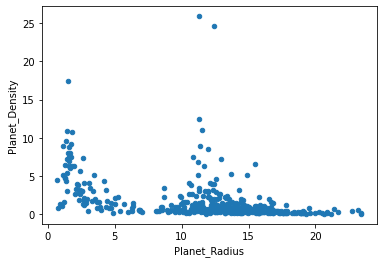

In [20]:
rename_df.plot.scatter(x = "Planet_Radius", y = "Planet_Density", legend = False)

In [32]:
def plot(Planet_Radius, Planet_Density, good):
    
    fig, ax = plt.subplots()
    cmap, norm = from_levels_and_colors([0.0, 0.5, 1.5], ['red', 'black'])
    points = np.array(["Planet_Radius", "Planet_Density"]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lines = LineCollection(segments, cmap=cmap, norm=norm)
    lines.set_array(good.astype(int))
    ax.add_collection(lines)
    plt.show()